# Ocean Proximity as a Linear Regression Problem

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

After importing the libraries, the datasets are loaded: the $magic$ $command$ %run executes a .py file

In [2]:
%run 1.ReadingData.py

Name of the label file: OceanProximityDiscretizedClasses.csv
x_train: (16342, 9)
t_train: (16342, 1)
x_dev: (2043, 9)
t_dev: (2043, 1)
x_test: (2043, 9)
t_test: (2043, 1)


In [3]:
t_train = t_train.reshape((1,-1))[0]
t_dev = t_dev.reshape((1,-1))[0]
t_test = t_test.reshape((1,-1))[0]

## Initialization

In [4]:
INPUTS = x_train.shape[1]
OUTPUTS = 1
NUM_TRAINING_EXAMPLES = round(x_train.shape[0]/10) # training and dev examples are
NUM_DEV_EXAMPLES = round (x_dev.shape[0]/10) # reduced to avoid excessive time spent

In [5]:
x_train[:5]

array([[ 0.42031873, -0.66206164, -0.64705882, -0.69739051, -0.58752328,
        -0.82056672, -0.61914159, -0.69639039, -0.60742018],
       [ 0.43027888, -0.98087141, -0.01960784, -0.91784933, -0.91371819,
        -0.84629614, -0.91810557, -0.58127474, -0.78350192],
       [ 0.26294821, -0.72582359, -0.1372549 , -0.94485986, -0.91713222,
        -0.95392248, -0.91810557, -0.72952097, -0.15628802],
       [-0.44621514, -0.05632306, -0.49019608, -0.73401495, -0.74674115,
        -0.85251829, -0.73754317, -0.3834154 ,  0.09195838],
       [-0.39243028,  0.16471838, -0.41176471, -0.86189532, -0.80757294,
        -0.81277502, -0.78885052, -0.7176039 , -0.62350258]])

In [6]:
t_train[:5]

array([1, 3, 0, 1, 1])

In [7]:
x_dev[:5]

array([[-0.07171315, -0.10733262, -0.1372549 , -0.89343303, -0.88081937,
        -0.94910171, -0.86712712, -0.58443332, -0.56041006],
       [-0.4123506 , -0.18384697,  0.49019608, -0.88371738, -0.83612663,
        -0.91894392, -0.86548265, -0.60979849, -0.27587515],
       [-0.61952191,  0.11583422,  1.        , -0.9123048 , -0.88112973,
        -0.96575016, -0.88324289, -0.56120605,  0.99999588],
       [ 0.45418327, -0.9957492 , -0.17647059, -0.88961799, -0.82557418,
        -0.88531069, -0.82798882, -0.79089944, -0.48742067],
       [ 0.15338645, -0.64930925,  0.33333333, -0.96032352, -0.95561763,
        -0.97634463, -0.95428383, -0.31657494, -0.23133925]])

In [8]:
t_dev[:5]

array([1, 0, 2, 3, 0])

## Hyperparameters 

In [9]:
n_epochs = 2000
learning_rate = 0.1

## Definition of the neural network tensor graph

A placeholder is a special variable whose value will be assigned later. <b>X</b> stands for the input tensor, the inputs to the neural network, <b>y</b> is the output, and <b>t</b> is the target output of the supervised learning.

In [10]:
X = tf.placeholder (dtype=tf.float32, shape=[None,INPUTS], name="X")
t = tf.placeholder (dtype=tf.float32, shape=[None], name="t")

A variable can change its value during the execution phase. <b>W</b> is a matrix of weights (<b>kernel</b>). In this case, a column vector since there is just one output. <b>b</b> is the bias vector, an scalar in this study case. 

In [11]:
W = tf.Variable (tf.random_uniform([INPUTS,1], -1.0,1.0), name="W")
b = tf.Variable (.0, name="bias")

Now, the output y is computed:

In [12]:
y = tf.matmul(X,W)+b

The loss function is the SSE, defined by $E_p(W)=(y_p-t_p)^2$. The cost function is defined by $MSE=\frac{1}{P} \sum_{i=1}^{P}(y_i-t_i)^2$

In [13]:
loss = tf.square(y-t)
mse = tf.reduce_mean(loss,name="cost")

The learning method is the gradient descent to minimize the cost MSE, with the previously defined (hyperparameter) learning rate $\alpha$:

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate) #LMS in this case
training_op = optimizer.minimize(mse)

Finally, all variables are initialized prior to executing the graph:

In [15]:
init = tf.global_variables_initializer()

## Running the tensorflow graph

In [16]:
mse_array = []

# First, a session is executed
with tf.Session() as sess:
    sess.run(init)
    for epoch in tqdm(range(n_epochs)): #for each epoch a learning iteration is computed
        sess.run(training_op, feed_dict={X: x_train[:NUM_TRAINING_EXAMPLES], 
                                         t: t_train[:NUM_TRAINING_EXAMPLES]})
        mse_array.append (mse.eval(feed_dict={X: x_train[:NUM_TRAINING_EXAMPLES], 
                                                t: t_train[:NUM_TRAINING_EXAMPLES]}))
    final_training_mse = mse.eval(feed_dict={X: x_train[:NUM_TRAINING_EXAMPLES], 
                                            t: t_train[:NUM_TRAINING_EXAMPLES]})
    dev_mse = mse.eval(feed_dict={X: x_dev[:NUM_DEV_EXAMPLES], 
                                  t: t_dev[:NUM_DEV_EXAMPLES]})
    computed_outputs = y.eval(feed_dict={X: x_dev[:NUM_DEV_EXAMPLES]})

100%|██████████| 2000/2000 [02:04<00:00, 16.06it/s]


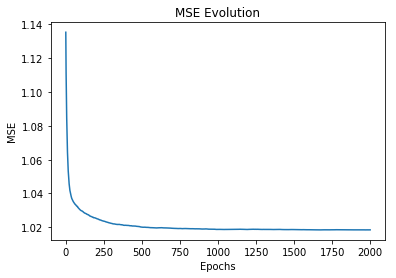

In [17]:
plt.title("MSE Evolution")
plt.xlabel("Epochs")
plt.ylabel("MSE");
plt.plot(range(n_epochs),mse_array)

<b>The learning process falls into a local optimum</b> in a MSE of about 1. The MSE evolution turns into a flat line from 1,500 epochs. A non-linear problem is tried to be solved with linear regression. 

In [18]:
"Final training MSE: " + str(final_training_mse)

'Final training MSE: 1.0184555'

In [19]:
"Dev MSE: " + str(dev_mse)

'Dev MSE: 0.97868484'

</b>The final MSE for both the training and development datasets are too high</b>. Good results were not expected even though a small subset of the training samples are involved since a linear regression algorithm is being used to solve a non-linear problem. Next, the comparison between computed and target outputs is shown for the 10 first develoment examples. 

In [20]:
comparison = pd.DataFrame([[computed,dev] for computed, dev 
        in zip(computed_outputs.reshape([computed_outputs.shape[0]]), 
               t_dev[:NUM_DEV_EXAMPLES])], columns=["y","t"])

In [21]:
comparison[:10]

,y,t
0,0.887487,1
1,0.883364,0
2,0.880687,2
3,0.885280,3
4,0.891493,0
5,0.885119,0
6,0.882976,0
7,0.885779,0
8,0.882598,1
9,0.890736,1


Note that the computed values are all around 0.9, the mean value of the discretized target outputs, considering that the class 0 contains most of the examples, to achieve the lowest error. More accurate results can not be computed since this is a linear neural network 